In [1]:
%load_ext autoreload
%autoreload 2
import dlpy
import swat
import onnx
import numpy as np

In [2]:
server_side_root = "/mnt/smartfashion"  # repo must be mounted into ViyaContainer so that Server can access generated model weight files 

In [3]:
s = swat.CAS("localhost", 5570, "sasdemo", "SASpw1")
s.loadactionset("deepLearn")
s.loadactionset("table")

NOTE: Added action set 'deepLearn'.
NOTE: Added action set 'table'.


[actionset]

 'table'

+ Elapsed: 0.000514s, user: 0.000215s, sys: 0.000246s, mem: 0.203mb

In [4]:
onnx_model = onnx.load_model("../exports/AttrPredModel_SAS.onnx")
output_layer = dlpy.layers.OutputLayer(name='output',
                                    act='sigmoid',
                                    error="entropy",
                                    n=228,
                                    include_bias=False,
                                    full_connect = False)
model = dlpy.Model.from_onnx_model(s, onnx_model, offsets=list(np.array([0.6765, 0.6347, 0.6207])*255), norm_stds=list(np.array([0.3284, 0.3371, 0.3379])*255), std="STD", output_layer=output_layer).to_functional_model()
model.compile()

NOTE: Successfully written weights file as C:\Users\germpr\OneDrive - SAS\smartfashion\import2SAS\onnx_model_HfQMsK_weights.onnxmodel.h5
NOTE: Model table is attached successfully!
NOTE: Model is named to "onnx_model_hfqmsk" according to the model name in the table.
NOTE: Successfully imported ONNX model.
NOTE: Model compiled successfully.


In [5]:
model.load_weights(server_side_root+"/notebooks/onnx_model_gZc6P7_weights.onnxmodel.h5")

NOTE: no dataspec(s) provided - creating image classification model.
NOTE: Model weights attached successfully!


In [6]:
dataset = dlpy.images.ImageTable.load_files(s, server_side_root + "/Data/iMaterialist")
dataset.resize(512,512)

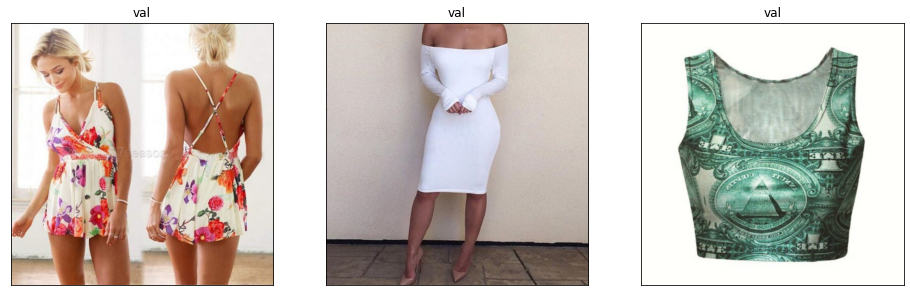

In [7]:
dataset.show(nimages=9, randomize=False)

In [8]:
attribute_name_list = np.array(['Argyle','Asymmetric','Athletic Pants','Athletic Sets','Athletic Shirts','Athletic Shorts','Backless Dresses','Baggy Jeans','Bandage','Bandeaus','Batwing Tops','Beach & Swim Wear','Beaded','Beige','Bikinis','Binders','Black','Blouses','Blue','Bodycon','Bodysuits','Boots','Bra Straps','Bronze','Brown','Bubble Coats','Business Shoes','Camouflage','Canvas','Capes & Capelets','Capri Pants','Cardigans','Cargo Pants','Cargo Shorts','Cashmere','Casual Dresses','Casual Pants','Casual Shirts','Casual Shoes','Casual Shorts','Chambray','Checkered','Chevron','Chiffon','Clear','Cleats','Clubbing Dresses','Cocktail Dresses','Collared','Corduroy','Corsets','Costumes & Cosplay','Cotton','Criss Cross','Crochet','Crop Tops','Custom Made Clothing','Dance Wear','Denim','Drawstring Pants','Dress Shirts','Dresses','Embroidered','Fashion Sets','Faux Fur','Female','Flannel','Flats','Fleece','Floral','Formal Dresses','Fringe','Furry','Galaxy','Geometric','Gingham','Gold','Gray','Green','Halter Tops','Harem Pants','Hearts','Heels','Herringbone','Hi-Lo','Hiking Boots','Hollow-Out','Hoodies & Sweatshirts','Hosiery, Stockings, Tights','Houndstooth','Jackets','Jeans','Jerseys','Jilbaab','Jumpsuits Overalls & Rompers','Kimonos','Knit','Lace','Leather','Leggings','Leopard And Cheetah','Linen','Lingerie Sleepwear & Underwear','Loafers & Slip-on Shoes','Long Sleeved','Male','Marbled','Maroon','Maternity','Mesh','Multi Color','Neoprene','Neutral','Nightgowns','Nylon','Off The Shoulder','Orange','Organza','Padded Bras','Paisley','Pajamas','Party Dresses','Pasties','Patent','Peach','Peacoats','Pencil Skirts','Peplum','Petticoats','Pin Stripes','Pink','Plaid','Pleated','Plush','Polka Dot','Polos','Polyester','Printed','Prom Dresses','Puff Sleeves','Pullover Sweaters','Purple','Quilted','Racerback','Rain Boots','Raincoats','Rayon','Red','Reversible','Rhinestone Studded','Ripped','Robes','Round Neck','Ruched','Ruffles','Running Shoes','Sandals','Satin','Sequins','Sheer Tops','Shoe Accessories','Shoe Inserts','Shoelaces','Short Sleeves','Shorts','Shoulder Drapes','Silk','Silver','Skinny Jeans','Skirts','Sleeveless','Slippers','Snakeskin','Sneakers','Spaghetti Straps','Spandex','Sports Bras','Square Necked','Stilettos','Strapless','Stripes','Suede','Suits & Blazers','Summer','Sweatpants','Sweetheart Neckline','Swim Trunks','Swimsuit Cover-ups','Swimsuits','T-Shirts','Taffeta','Tan','Tank Tops','Teal','Thermal Underwear','Thigh Highs','Thongs','Three Piece Suits','Tie Dye','Trench Coats','Trousers','Tube Tops','Tulle','Tunic','Turtlenecks','Tutus','Tweed','Twill','Two-Tone','U-Necks','Undershirts','Underwear','Uniforms','V-Necks','Velour','Velvet','Vests','Vintage Retro','Vinyl','Wedding Dresses','Wedges & Platforms','White','Winter Boots','Wool','Wrap','Yellow','Yoga Pants','Zebra'])

In [9]:
pred_res = model.predict(data=dataset)  # for some reason throws an uninformative error when I make the dataset bigger, might be due to limited computational power of my machine though

NOTE: Due to data distribution, miniBatchSize has been limited to 1.


In [10]:
# loading prediction table + dropping unnecessary cols 
pred_table = pred_res["OutputCasTables"].iloc[0]["casTable"]

# giving remaining cols more meaningful name
s.table.alterTable(name=pred_table.name, columns=[{"name": f"P__label_{i:03d}", "rename":f"{attribute_name_list[i]}"} for i in range(228)], drop=["_image_", "_label_", "I__label_", "_DL_PredP_", "_DL_PredLevel_"])

+ Elapsed: 0.0218s, user: 0.0217s, mem: 1.15mb

In [11]:
pred_table.head()

,_filename_0,_id_,Argyle,Asymmetric,Athletic Pants,Athletic Sets,Athletic Shirts,Athletic Shorts,Backless Dresses,Baggy Jeans,...,Vinyl,Wedding Dresses,Wedges & Platforms,White,Winter Boots,Wool,Wrap,Yellow,Yoga Pants,Zebra
0,7.jpg,1,0.000004,0.012341,0.000002,0.000180,0.000025,0.000004,0.204410,6.767385e-06,...,0.000005,2.635865e-05,3.788355e-07,0.131567,3.074065e-08,0.000127,0.006200,0.016041,1.973708e-05,0.000337
1,8.jpg,2,0.000003,0.012573,0.000046,0.000005,0.000004,0.000019,0.011202,4.964131e-06,...,0.000135,6.236168e-04,5.734312e-05,0.115115,2.141752e-05,0.017455,0.019452,0.011204,5.711788e-05,0.000298
2,9.jpg,3,0.000002,0.000066,0.000002,0.000054,0.000092,0.000031,0.002152,2.356618e-07,...,0.000003,7.971100e-08,7.170530e-06,0.020420,3.444198e-10,0.000002,0.000029,0.001622,7.058319e-07,0.002232


In [12]:
# print predicted attributes (attributes with probability over .5 are counted only)
pred_matrix = pred_table.as_matrix()
img_names = pred_matrix[:,0].astype(str)
img_ids = pred_matrix[:,1].astype(int)
img_attr_probs = pred_matrix[:, 2:].astype(float)
pred_attrs = [[attribute_name_list[np.where(col>0.4)]] for col in img_attr_probs]

In [13]:
pred_attrs

[[array(['Female', 'Sleeveless', 'V-Necks'], dtype='<U30')],
 [array(['Bodycon', 'Dresses', 'Female', 'Long Sleeved', 'Off The Shoulder'],
        dtype='<U30')],
 [array(['Crop Tops', 'Female', 'Polyester', 'Printed', 'Sleeveless',
         'Spandex'], dtype='<U30')]]

## Comparing with onnx model

In [14]:
import onnxruntime
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

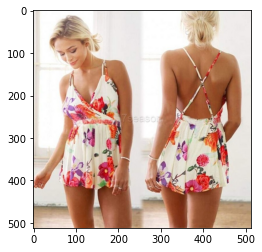

Predicted Attributes:  ['Female' 'Jumpsuits Overalls & Rompers' 'Sleeveless' 'Spaghetti Straps'
 'V-Necks']


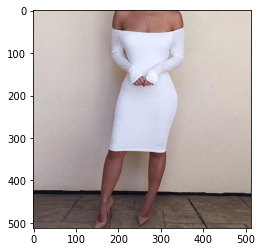

Predicted Attributes:  ['Bodycon' 'Dresses' 'Female' 'Long Sleeved' 'Off The Shoulder' 'White']


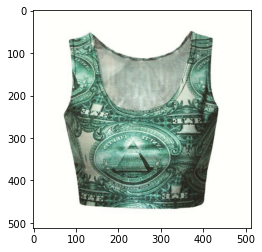

Predicted Attributes:  ['Female' 'Printed' 'Sleeveless' 'Spandex']


In [15]:
ort_session = onnxruntime.InferenceSession("../exports/AttrPredModel_SAS.onnx")

for img_path in [os.path.join("../Data/iMaterialist/val", img_name) for img_name in sorted(os.listdir("../Data/iMaterialist/val"))[-3:]]:
    img = Image.open(img_path).convert("RGB").resize((512,512))
    img_np = (np.array(img).astype(np.float32) - np.array([0.6765, 0.6347, 0.6207])*255)/(np.array([0.3284, 0.3371, 0.3379])*255)
    img_np = img_np.transpose(-1,0,1)[None].astype(np.float32)
    ort_inputs={ort_session.get_inputs()[0].name:img_np}
    attr_scores = ort_session.run(None, ort_inputs)[0][0]
    pred_attrs = attribute_name_list[attr_scores>0.]  # must be different threshold then for sas model as no sigmoid activation function
    plt.imshow(img)
    plt.show()
    print("Predicted Attributes: ", pred_attrs)
    